# Градиентный спуск с дроблением шага по условию Армихо

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Functions.functions_under_study import f_well, f_poor, f_rozen, grad_well, grad_poor, grad_rozen
from Functions.optimization import armijo_grad_descent

In [3]:
func_names = [f_well, f_poor, f_rozen]
grad_names = [grad_well, grad_poor, grad_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_FUNC = len(func_names)

In [4]:
N_EPS = 5
EPS_INIT = -1
eps_var = np.logspace(EPS_INIT, EPS_INIT-N_EPS+1, N_EPS)
print(eps_var)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


In [5]:
x0_optim_arr     = np.empty((N_FUNC,), dtype='object')
x1_optim_arr     = np.empty((N_FUNC,), dtype='object')
iter_counter_arr = np.empty((N_FUNC,), dtype='object')
func_counter_arr = np.empty((N_FUNC,), dtype='object')
grad_counter_arr = np.empty((N_FUNC,), dtype='object')

# Начальное приближение.
x_init = np.array([-2.2, -2.2])

for ndx, func, grad in zip(range(N_FUNC), func_names, grad_names):
    
        x0_optim_list     = []
        x1_optim_list     = []
        iter_counter_list = []
        func_counter_list = []
        grad_counter_list = []
    
        for idx, eps in enumerate(eps_var):
            x_optim, _, iter_final, func_counter, grad_counter = armijo_grad_descent(
                                                                                        loss_func=func,
                                                                                        grad_func=grad,
                                                                                        x_init=x_init,
                                                                                        lr_multiplier=0.5,
                                                                                        lr_coeff=0.5, 
                                                                                        tolerance=eps,
                                                                                        printoutput=False
                                                                                        )
            x0_optim_list.append(x_optim[0])
            x1_optim_list.append(x_optim[1])
            iter_counter_list.append(iter_final)
            func_counter_list.append(func_counter)
            grad_counter_list.append(grad_counter)
                       
        x0_optim_arr[ndx] = x0_optim_list
        x1_optim_arr[ndx] = x1_optim_list
        iter_counter_arr[ndx] = iter_counter_list
        func_counter_arr[ndx] = func_counter_list
        grad_counter_arr[ndx] = grad_counter_list

Преобразуем в таблицы.

In [6]:
col_name_x_optim = []
for var_name in func_labels:
    col_name_x_optim.append(var_name + ' (x1)')
    col_name_x_optim.append(var_name + ' (x2)')

x_optim_tbl      = eps_var.copy()
iter_counter_tbl = eps_var.copy()
func_counter_tbl = eps_var.copy()
grad_counter_tbl = eps_var.copy()

for colx1, colx2, col_iter, col_func, col_grad in zip(
                                                        x0_optim_arr,
                                                        x1_optim_arr,
                                                        iter_counter_arr,
                                                        func_counter_arr,
                                                        grad_counter_arr
                                                        ):
    x_optim_tbl      = np.vstack((x_optim_tbl, colx1, colx2))
    iter_counter_tbl = np.vstack((iter_counter_tbl, col_iter))
    func_counter_tbl = np.vstack((func_counter_tbl, col_func))
    grad_counter_tbl = np.vstack((grad_counter_tbl, col_grad))

x_optim_tbl_set = pd.DataFrame(x_optim_tbl.T, columns=['eps'] + col_name_x_optim)

iter_counter_tbl_set = pd.DataFrame(iter_counter_tbl.T, columns=['eps'] + func_labels)
iter_counter_tbl_set[func_labels] = iter_counter_tbl_set[func_labels].astype(int)

func_counter_tbl_set = pd.DataFrame(func_counter_tbl.T, columns=['eps'] + func_labels)
func_counter_tbl_set[func_labels] = func_counter_tbl_set[func_labels].astype(int)

grad_counter_tbl_set = pd.DataFrame(grad_counter_tbl.T, columns=['eps'] + func_labels)
grad_counter_tbl_set[func_labels] = grad_counter_tbl_set[func_labels].astype(int)

In [7]:
tables_all = [x_optim_tbl_set, iter_counter_tbl_set, func_counter_tbl_set, grad_counter_tbl_set]
titles_all = [
    'Координаты минимума функции',
    'Количество итераций',
    'Количество вычислений функции',
    'Количество вычислений градиента']

In [8]:
for ttl, tbl in zip(titles_all, tables_all):
    print(ttl)
    display(tbl)

Координаты минимума функции


,eps,Well-conditioned (x1),Well-conditioned (x2),Poorly-conditioned (x1),Poorly-conditioned (x2),Rosenbrock (x1),Rosenbrock (x2)
0,0.10000,-0.027280,-0.000176,-5.494847,-0.207248,0.901651,0.812605
1,0.01000,-0.002182,-0.000014,-5.517025,-0.207738,0.988969,0.978014
2,0.00100,-0.000175,-0.000001,-5.519244,-0.207787,0.998996,0.997989
3,0.00010,-0.000035,0.000035,-5.519456,-0.207792,0.999892,0.999784
4,0.00001,-0.000003,0.000003,-5.519478,-0.207792,0.999989,0.999978


Количество итераций


,eps,Well-conditioned,Poorly-conditioned,Rosenbrock
0,0.10000,5,172,503
1,0.01000,7,250,928
2,0.00100,9,328,1063
3,0.00010,10,403,1175
4,0.00001,12,485,1325


Количество вычислений функции


,eps,Well-conditioned,Poorly-conditioned,Rosenbrock
0,0.10000,19,1656,5253
1,0.01000,25,2404,9591
2,0.00100,31,3152,10865
3,0.00010,34,3871,11900
4,0.00001,40,4657,13286


Количество вычислений градиента


,eps,Well-conditioned,Poorly-conditioned,Rosenbrock
0,0.10000,6,173,504
1,0.01000,8,251,929
2,0.00100,10,329,1064
3,0.00010,11,404,1176
4,0.00001,13,486,1326


# Графики

In [9]:
user_figsize = (12, 6)
user_fontsize = 16
user_markersize = 12

## Координаты минимума функции

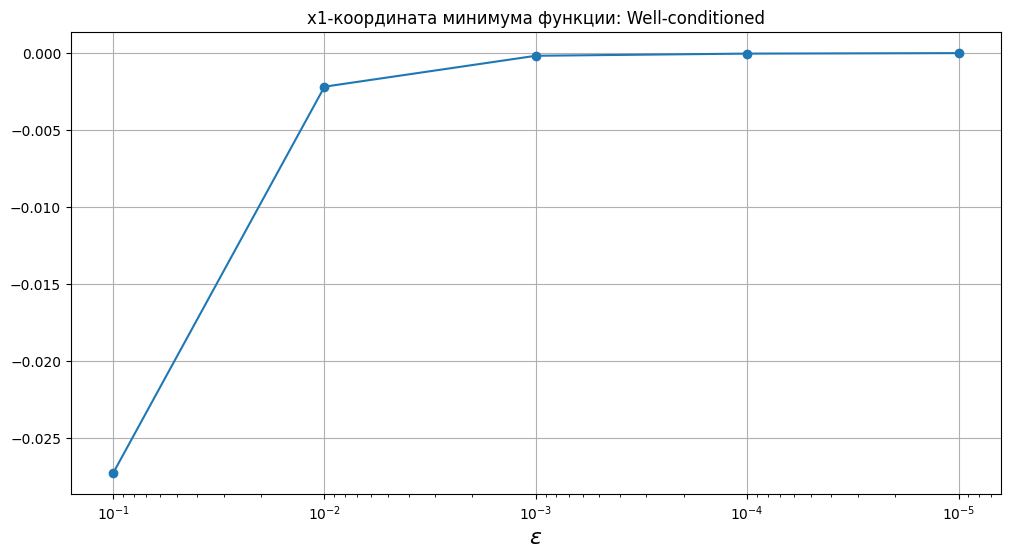

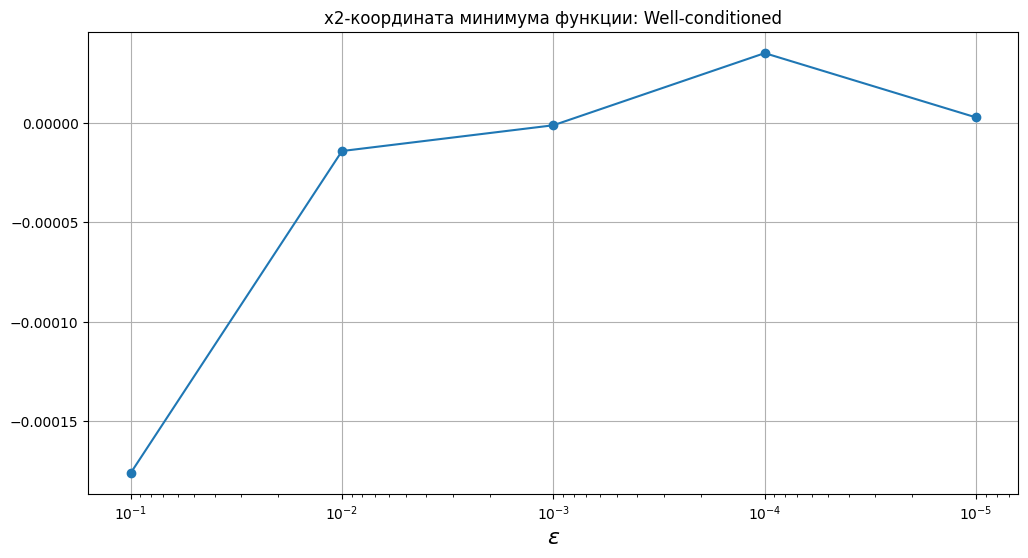

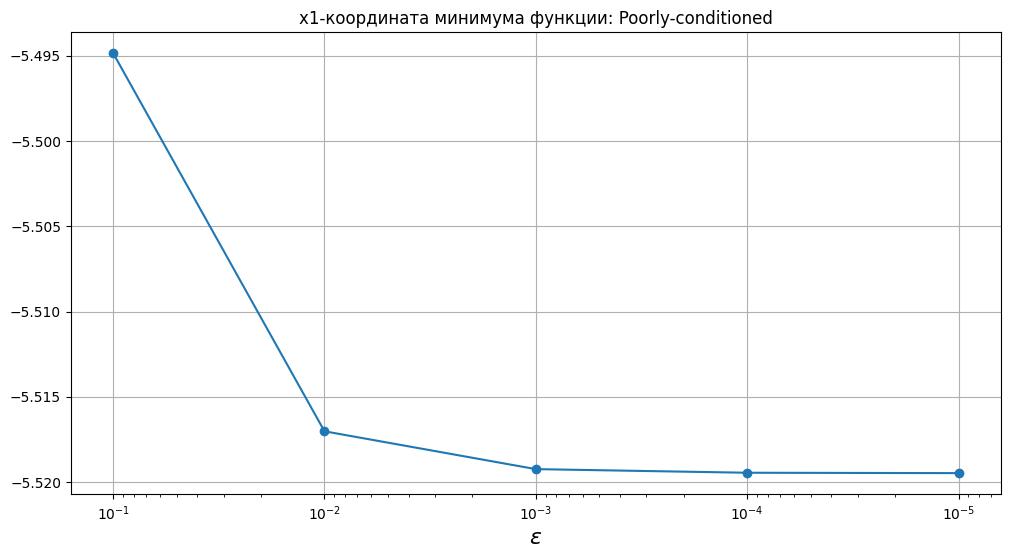

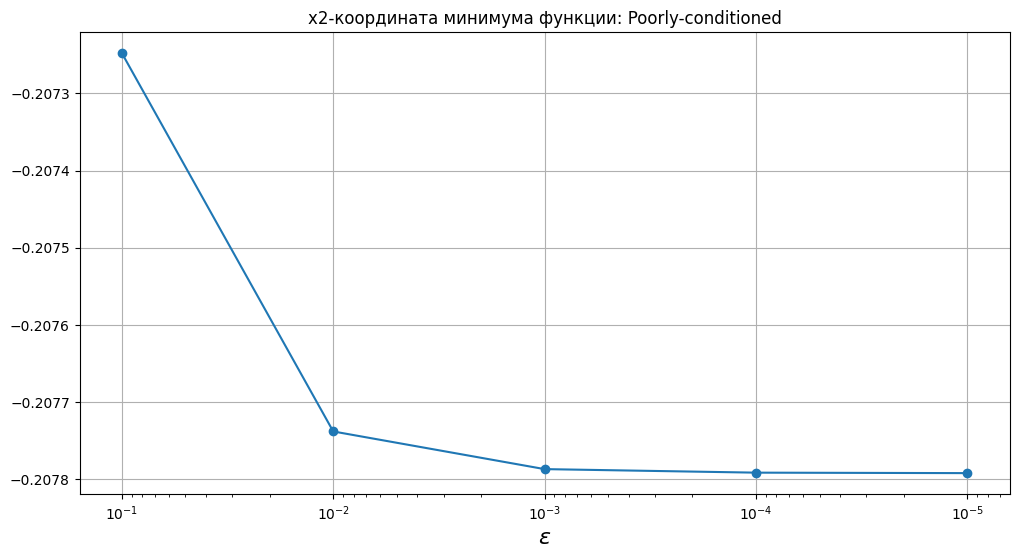

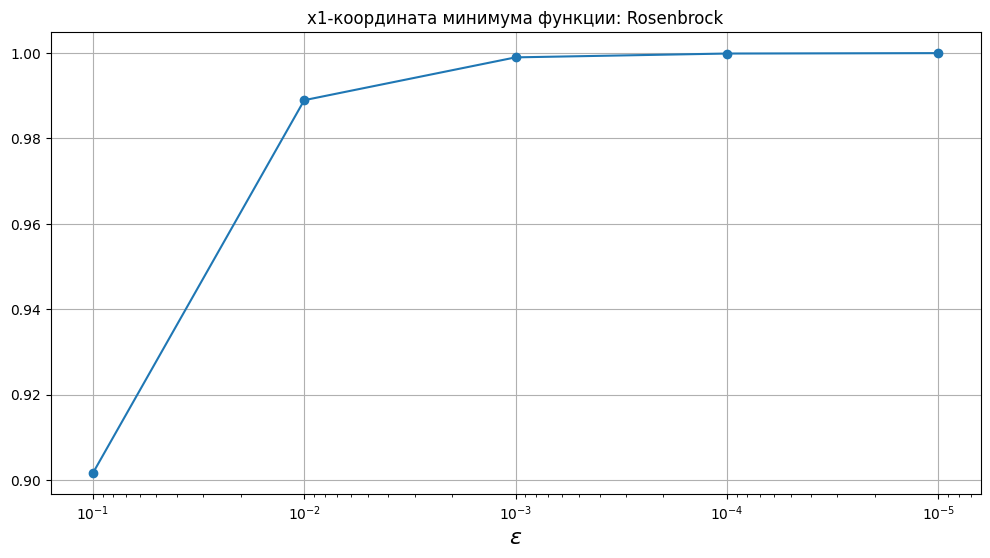

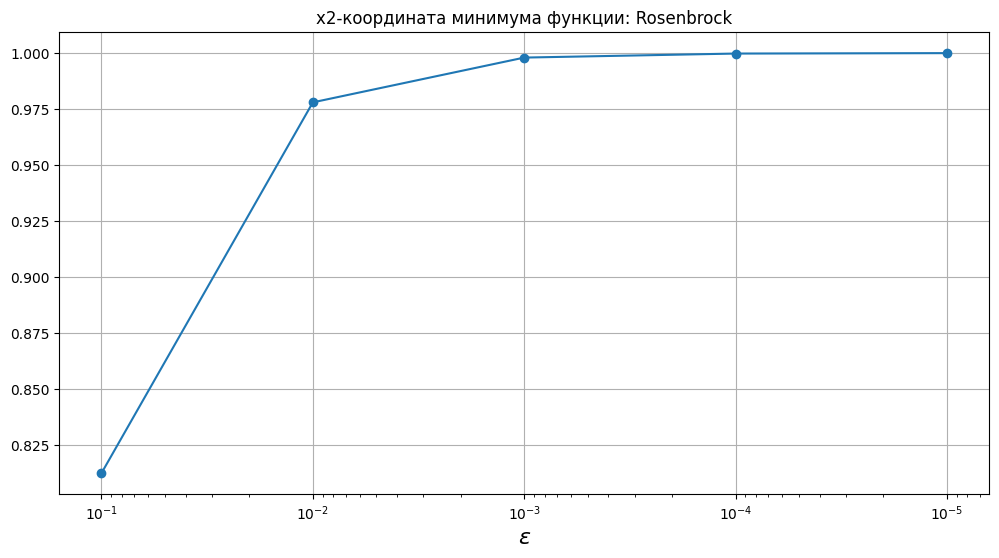

In [11]:
for ndx, lbl in enumerate(func_labels):
    for idx in range(2):
        plt.figure(figsize=user_figsize)
        plt.plot(
            x_optim_tbl_set['eps'],
            x_optim_tbl_set.iloc[:,(1+idx)+2*ndx],
            marker='.', markersize=user_markersize)
        plt.gca().invert_xaxis()
        plt.title('x' + str(idx+1) + '-координата минимума функции: ' + lbl)
        plt.grid()
        plt.xscale('log')
        plt.xlabel('$\epsilon$', fontsize=user_fontsize)
        plt.savefig('readme_img/armijo_step_descent_img/' + 'x' + str(idx+1) + '_optim_' + lbl + '.png', bbox_inches='tight')
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


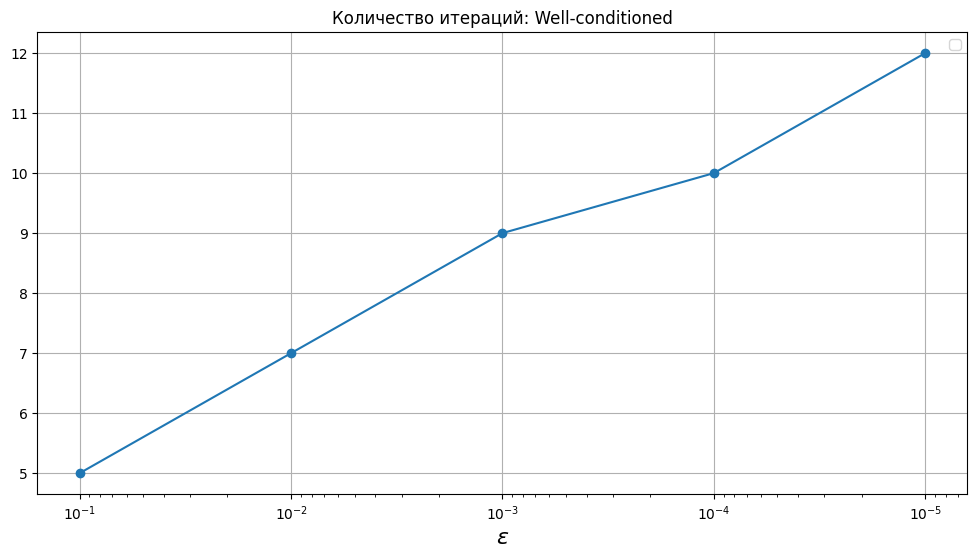

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


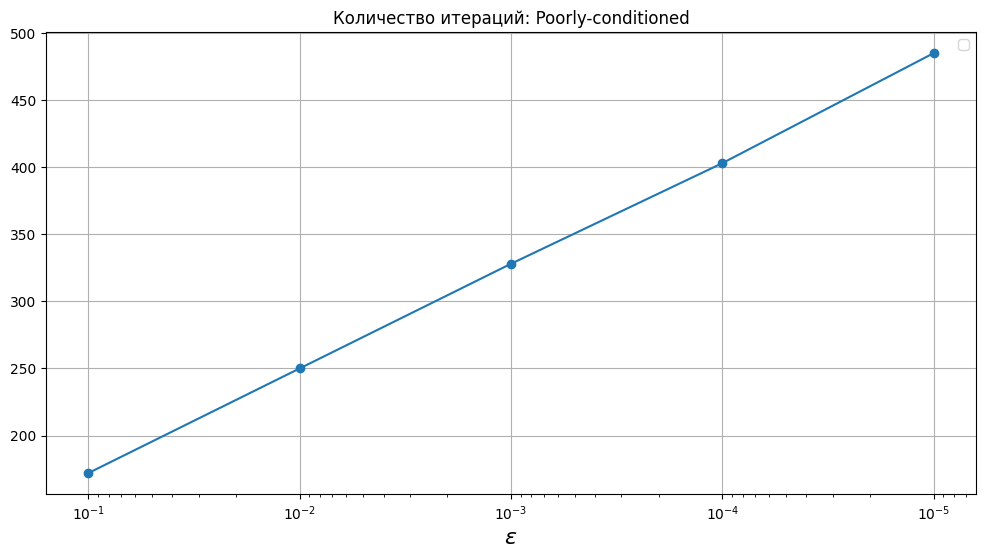

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


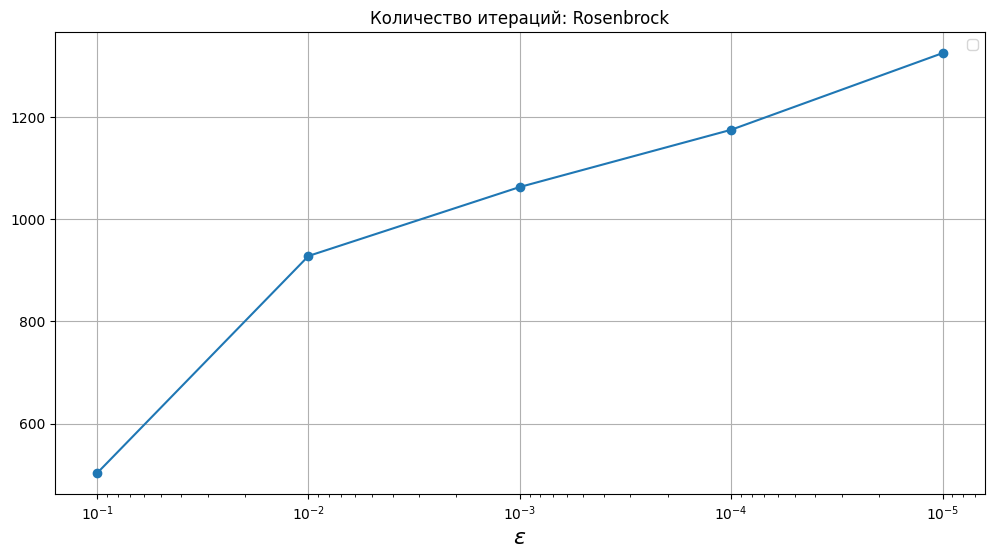

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


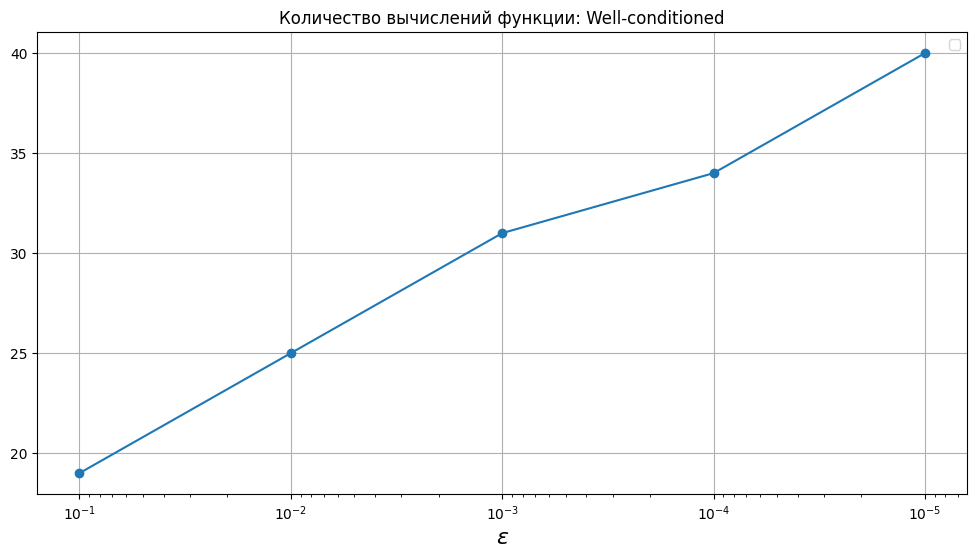

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


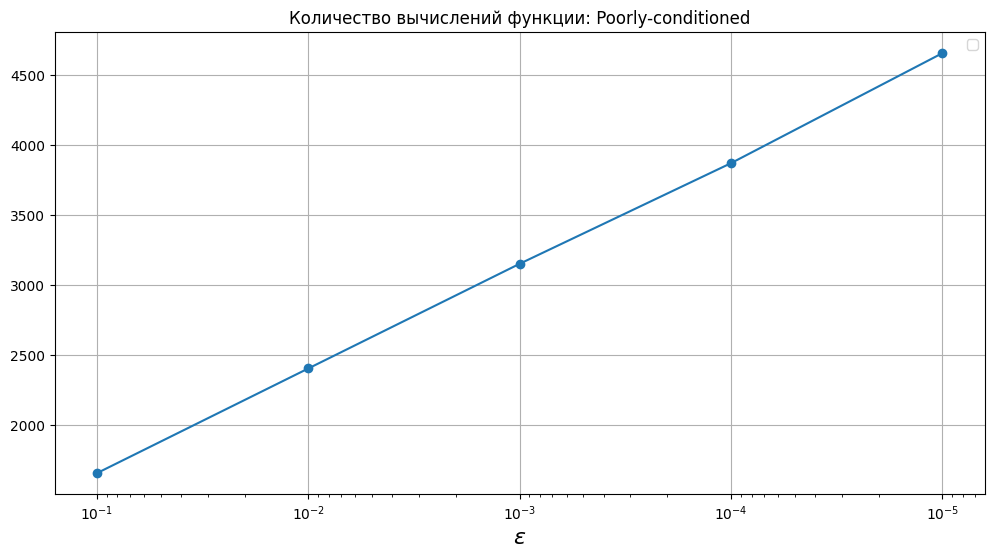

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


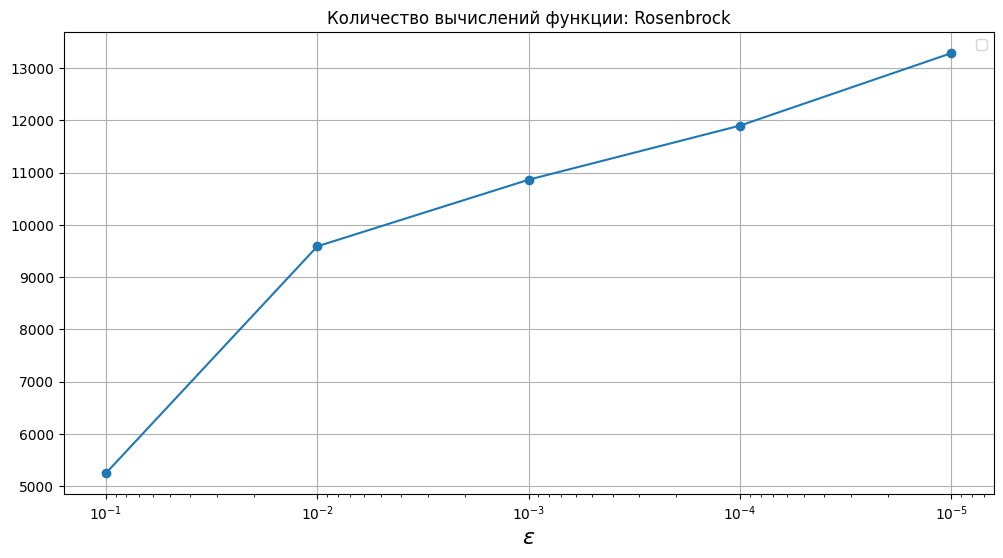

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


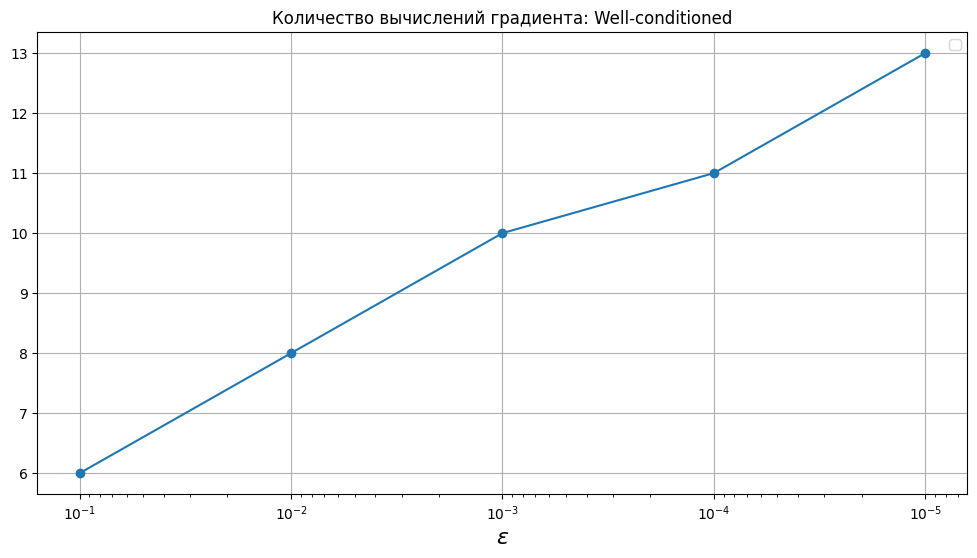

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


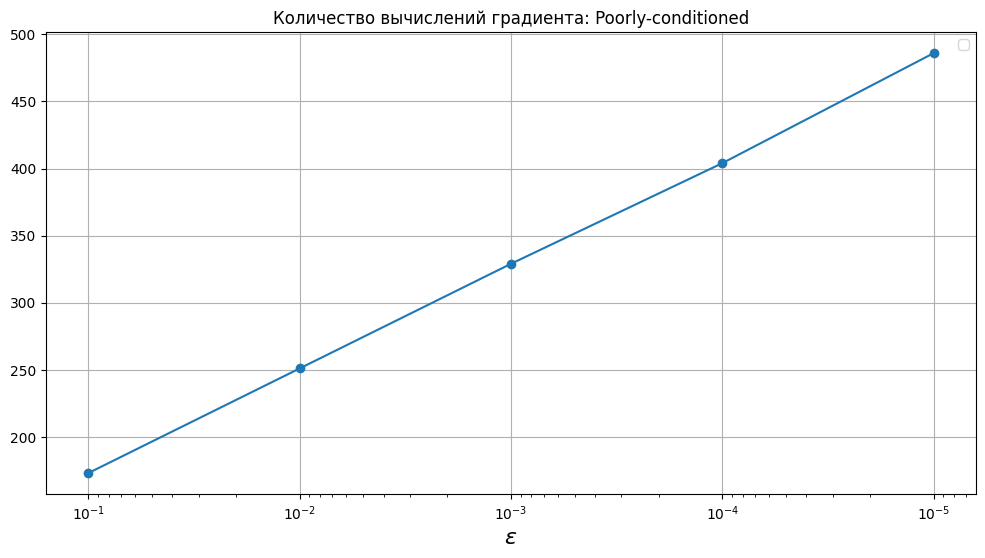

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


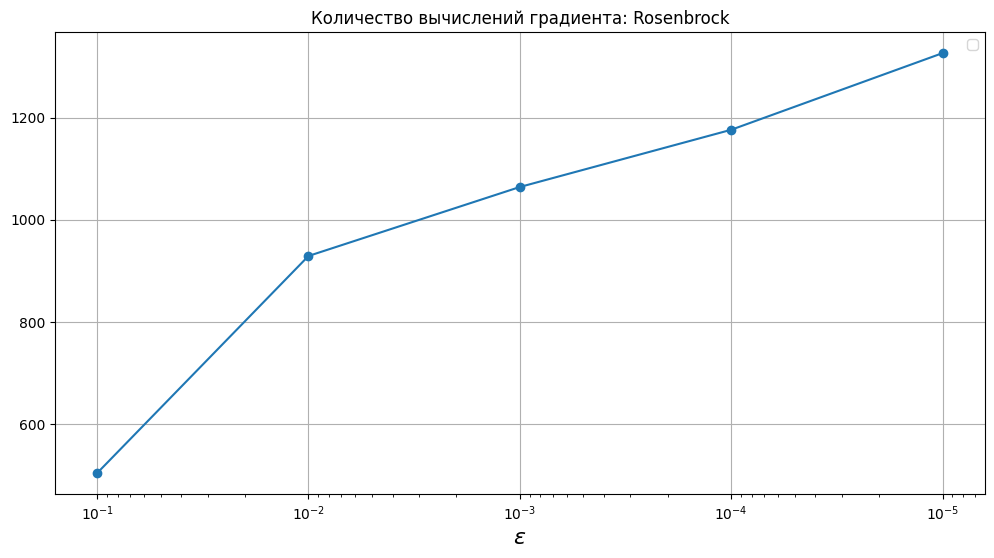

In [13]:
file_name_all = [
        'x_optim',
        'iter_count',
        'func_count',
        'grad_count'
        ]

for ttl, tbl, file_name in zip(titles_all[1:], tables_all[1:], file_name_all[1:]):
        for ndx, lbl in enumerate(func_labels):
                plt.figure(figsize=user_figsize)
                plt.plot(
                        tbl['eps'],
                        tbl.iloc[:,1+ndx],
                        marker='.', markersize=user_markersize)
                plt.gca().invert_xaxis()
                plt.title(ttl + ': ' + lbl)
                plt.grid()
                plt.xscale('log')
                plt.xlabel('$\epsilon$', fontsize=user_fontsize)
                plt.legend()
                plt.savefig('readme_img/armijo_step_descent_img/' + file_name + '_' + lbl + '.png', bbox_inches='tight')
                plt.show()

# Генератор таблиц в приложения

In [15]:
from Functions.user_functions import update_readme_section

In [16]:
section_names = ['x_optim', 'iter_counter', 'func_counter', 'grad_counter']

for tbl, ttl, section in zip(tables_all, titles_all, section_names):
    update_readme_section(tbl, readme_path='armijo_step_descent.md', tbl_name=ttl, section=section)